In [1]:
import numpy as np
import math
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
case = 4

if case == 0:
    corpuses = ["aladarV6a", "aladarV6b"]
    vectorSizes = [100, 200, 300, 400]
    windowSizes = [8, 10, 15, 20, 25]
    iterations = [20, 40, 50]
    xMaxs = [5, 10, 50, 100]

elif case == 1:
    corpuses = ["aladarV6a", "aladarV6b"]
    vectorSizes = [10, 25, 50]
    windowSizes = [2, 4, 6, 8, 10]
    iterations = [10, 20, 40]
    xMaxs = [2, 5, 10]

elif case == 2:
    corpuses = ["aladarV6a", "aladarV6b"]
    vectorSizes = [60, 70, 80, 90, 100]
    windowSizes = [6, 8, 10]
    iterations = [10, 20, 40, 50]
    xMaxs = [10, 100]
    
elif case == 3:
    corpuses = ["aladarV6a", "aladarV6b"]
    vectorSizes = [10, 25, 50, 60, 70, 80, 90, 100, 200, 300, 400]
    windowSizes = [2, 4, 6, 8, 10, 15, 20, 25]
    iterations = [10, 20, 40, 50]
    xMaxs = [2, 5, 10, 50, 100]
    
elif case == 4:
    corpuses = ["aladarV7"]
    vectorSizes = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 300]
    windowSizes = [15]
    iterations = [50]
    xMaxs = [100]

topNumbers = [1, 5, 10, 15]
questions = ["benigno-tessuto", "maligno-tessuto", "benigno-maligno", "morfologia-sede", "gram8-plurali", "gram8-plurali-short", "total"]

hypercube = np.ones((len(corpuses), len(vectorSizes), len(windowSizes), len(iterations), len(xMaxs), len(topNumbers), len(questions)))*(-1)

In [3]:
errors = False
for cc,c in enumerate(corpuses):
    for vv,v in enumerate(vectorSizes):
        for ww,w in enumerate(windowSizes):
            for ii,i in enumerate(iterations):
                for xx,x in enumerate(xMaxs):
                    path = "auto/iter"+str(i)+"-xMax"+str(x)+"/out-"+str(c)+"-"+str(v)+"-"+str(w)+"/"
                    for tt,t in enumerate(topNumbers):
                        filename = "evalTOP"+str(t)+".txt"
                        try:
                            with open(path+filename) as f:
                                while True:
                                    l = f.readline()
                                    quest = re.sub("\.txt:\n", "", l)
                                    l = f.readline()
                                    val = float(re.sub(".*: (.+)%.*", "\\1", l))

                                    found = False
                                    for qq in range(len(questions) - 1):
                                        if quest == questions[qq]:
                                            found = True
                                            hypercube[cc,vv,ww,ii,xx,tt,qq] = val
                                            break
                                    if not found:
                                        hypercube[cc,vv,ww,ii,xx,tt,len(questions)-1] = val
                                        break
                        except IOError:
                            #print("Error loading "+path+filename)
                            errors = True
                            pass

if errors:
    print("Error loading some files")

In [4]:
#corpus[0,1], vectorSize[0,2], windowSize[0,4], iterations[0,2], xMaxs[0,2], topNum[0,3], questions[0,6]
ext = hypercube[0,:,0,0,0,:,:]
maxFlat = np.argmax(ext)
maxCoord = []
restMax = maxFlat
for i in range(len(ext.shape)):
        restDim = 1
        for j in range(i+1, len(ext.shape)):
            restDim *= ext.shape[j]
        currCoord = math.floor(restMax / restDim)
        maxCoord.append(currCoord)
        restMax -= currCoord * restDim
#print(ext)
#print(maxFlat)
print(maxCoord)
#print("c={}; v={}; w={}; i={}; x={}".format(corpuses[maxCoord[0]], vectorSizes[maxCoord[1]], windowSizes[maxCoord[2]], iterations[maxCoord[3]], xMaxs[maxCoord[4]]))
print(ext[tuple(maxCoord)])

[3, 3, 3]
61.76


In [5]:
print(ext[:,:,6])
print(ext[:,0,6])
print(ext[:,3,3])

[[ 2.15  5.22  7.81  9.66]
 [ 2.27  5.94  8.48 10.36]
 [ 2.55  6.26  9.06 10.92]
 [ 2.85  6.54  9.34 11.49]
 [ 2.79  6.21  8.78 11.11]
 [ 2.71  6.27  8.84 11.16]
 [ 2.59  6.17  9.03 10.82]
 [ 2.62  6.24  9.   11.26]
 [ 2.46  6.15  8.79 10.88]
 [ 2.43  5.88  8.58 10.59]
 [ 2.52  5.84  8.65 10.84]
 [ 2.62  6.04  8.68 10.94]
 [ 2.71  5.97  8.84 11.27]
 [ 2.61  5.95  8.96 11.23]
 [ 2.6   6.17  8.87 11.13]
 [ 2.59  5.96  8.96 11.09]
 [ 2.75  6.35  9.37 11.5 ]
 [ 2.77  6.35  9.38 11.58]
 [ 2.41  6.34  9.62 12.  ]]
[2.15 2.27 2.55 2.85 2.79 2.71 2.59 2.62 2.46 2.43 2.52 2.62 2.71 2.61
 2.6  2.59 2.75 2.77 2.41]
[32.35 38.24 55.88 61.76 55.88 61.76 58.82 55.88 52.94 55.88 55.88 55.88
 55.88 55.88 55.88 52.94 52.94 52.94 44.12]


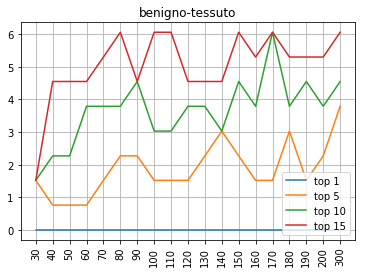

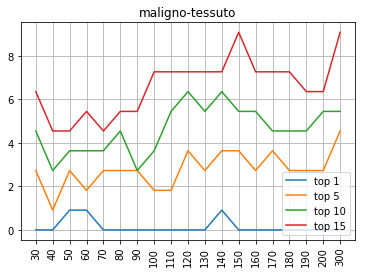

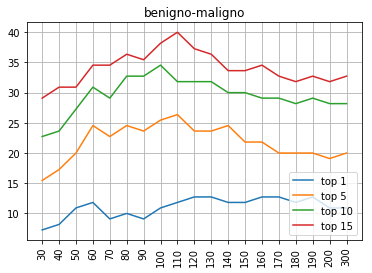

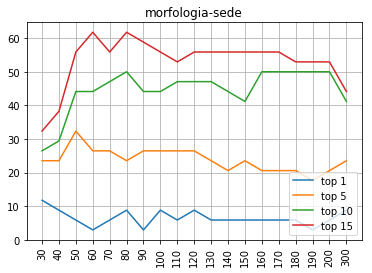

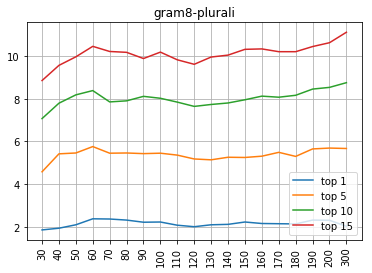

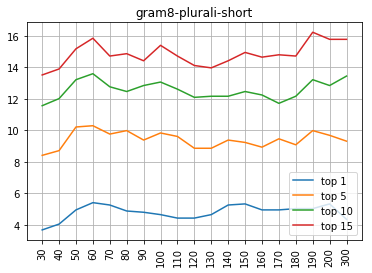

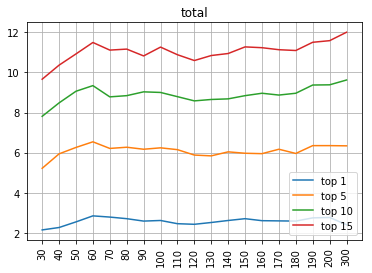

In [6]:
#iter[0,2], corpus[0,1], vectorSize[0,2], windowSize[0,2], topNum[0,3], questions[0,6]
#2,1,1,2,...
for question in range(len(questions)):
    toPlot = ext[:,:,question]
    for i in range(toPlot.shape[1]):
        plt.plot(toPlot[:,i],label="top "+str(topNumbers[i]))
        plt.xticks(range(len(vectorSizes)), vectorSizes, rotation='vertical')
    plt.legend(loc='lower right')
    plt.title(questions[question])
    plt.grid()
    plt.show()

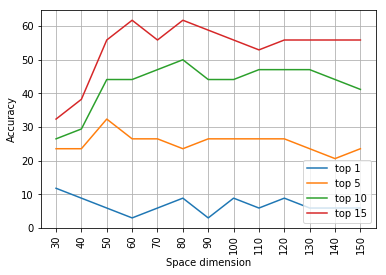

In [7]:
toPlot = ext[:,:,3]
lim = 13
for i in range(toPlot.shape[1]):
        plt.plot(toPlot[:lim,i],label="top "+str(topNumbers[i]))
        plt.xticks(range(len(vectorSizes[:lim])), vectorSizes[:lim], rotation='vertical')
plt.legend(loc='lower right')
#plt.title(questions[3])
plt.grid()
plt.xlabel("Space dimension")
plt.ylabel("Accuracy")
plt.savefig("/tmp/fig-glovePar.pdf", bbox_inches='tight')
plt.show()